# Exercise 1: Reading in netCDF files 

    

This notebook has been created by Julia Kukulies (julia.kukulies@gu.se) as a modified version from the exercise for GVN370 that has been created by Céline Heuzé. 

For this exercise, you will need the python package [**xarray**](http://xarray.pydata.org/en/stable/io.html). If you have not installed it yet, you can do so by running this command (you can either run it in a Jupyter notebook or in the command line, in the latter case remove the exclamation mark! )


In [ ]:
!pip install xarray

In [3]:
# always first thing with Python: import the packages you need 
import numpy as np 
import xarray as xr 

On Friday you should have downloaded some netCDF files...

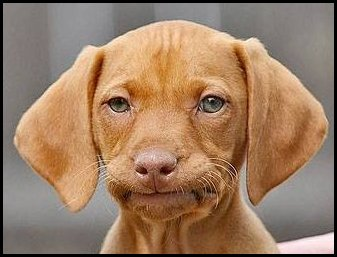

In [13]:
My unimpressed face when you have not. Get the one on Canvas then,now!

Netcdf is a community standard file format for climate data, so most datasets you will work with use it. As such, we concentrate  on this format  today, and will deal with other formats  as they arise. Or type in your favourite search engine ”load [format] [matlab or python]”, and you should get help.


Today, you are going to learn / refresh:

- to inspect the content of a netcdf file
- the concept of dimensions
- to load a specific variable
- to load a subset of that variable only, to save RAM
- manipulate date formats;-toadd a variable to a netcdf file

Note that there are specific softwares like **ncview** that you could use to perform some of these tasks faster and/or would let you see the data more clearly. But on the long run, having to move from software to software for each task is very inefficient, especially if the company you are with does not have access to one of them. So we’ll stick to Matlab or Python. 

Alright, let’s start!

# Inspect the content of a netcdf file

We use the monthly sea surface height from CMEMS in today’s demo. 

First, we need to define the filename or path, when the file is not located in the same folder as your Python script! 

In [11]:
# example when the file is somewhere else 
filename= '/home/juli/Desktop/phd/teaching/GVN370/cmems_mod_nws_phy-ssh_my_7km-2D_P1M-m_1611418096178.nc'

# example when the file is in the same folder 
filename= 'cmems_mod_nws_phy-ssh_my_7km-2D_P1M-m_1611418096178.nc'

Next step: Load the data with **xarray**. Because everything is an object in Python, you need to first create/instantiate an xarray object, that refers to the file. Then you can use functions (methods) for this object. Note, that netcdf files in Python are always loaded *lazily*, meaning that the data is not loaded into the memory before you perform any operations. 

In [12]:
data = xr.open_dataset(filename)

In [13]:
# now have a look at the data (click for example of the attributes of the dimensions and variables)
display(data)

<xarray.Dataset>
Dimensions:    (latitude: 375, longitude: 297, time: 324)
Coordinates:
  * latitude   (latitude) float32 40.06667 40.13334 ... 64.93458 65.00125
  * time       (time) object 1993-01-16 12:00:00 ... 2019-12-16 12:00:00
  * longitude  (longitude) float32 -19.88889 -19.77778 ... 12.88856 12.99967
Data variables:
    zos        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:          CF-1.7
    references:           http://marine.copernicus.eu/
    institution:          UK Met Office
    contact:              servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:    netCDF-4
    creation_date:        2020-08-08T00:00:00Z
    source:               AMM-FOAM 7 km (tidal) NEMO v3.6_FABM-ERSEM v15.06_N...
    product:              NWSHELF_MULTIYEAR_PHY_004_009
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    forcing_data_source:  ECMWF; ERA5
    licence:              http://marine.copernicus.eu/services-portfolio/serv...
    history:              See source and creation_date attributes
    title:                monthly-mean SSH (2D)
    _CoordSysBuilder:     ucar.nc2.dataset.conv.CF1Convention
    comment:

# The concept of dimensions

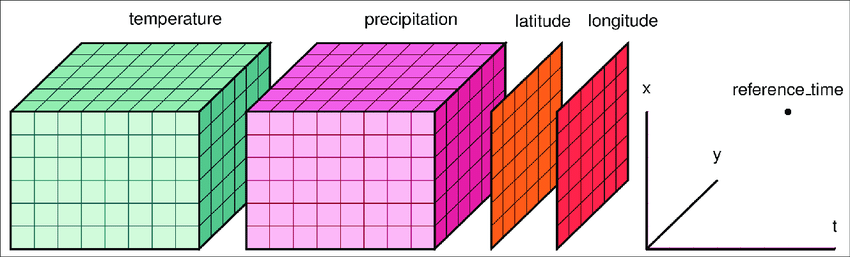

In [54]:
You can picture dimensions of the data like this:

My monthly sea surface height file has three dimensions:

In [37]:
data.dims

Frozen(SortedKeysDict({'latitude': 375, 'time': 324, 'longitude': 297}))

....and this variable:

In [46]:
data.data_vars

Data variables:
    zos      (time, latitude, longitude) float32 ...

The values of each dimension and variable are attributes of the datasets and can thus be accessed through a simple dot: 

In [49]:
# check out more information about the variable 
data.zos

<xarray.DataArray 'zos' (time: 324, latitude: 375, longitude: 297)>
[36085500 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 40.06667 40.13334 ... 64.93458 65.00125
  * time       (time) object 1993-01-16 12:00:00 ... 2019-12-16 12:00:00
  * longitude  (longitude) float32 -19.88889 -19.77778 ... 12.88856 12.99967
Attributes:
    standard_name:  sea_surface_height_above_geoid
    long_name:      Sea surface height above geoid
    units:          m
    cell_methods:   time: mean
    _ChunkSizes:    [  1 375 297]

In [57]:
# check out the shape of the data array 
data.zos.shape

(324, 375, 297)

You can see that the *zos* (sea surface height) variable has three dimensions or is in other words is **a function** of these three dimensions. In this example, *zos*  is a function of longitude, latitude and time.

That means that zos is stored as a three-dimensional array. This data array has **324** timesteps, **375**
latitudes and **297** longitudes. 

To access a specific longitude you will need to restrict its first dimension; latitude, its second; time, its third. The other way round, *zos* of all longitudes, at a fixed latitude and time is data.zos[:,fixedlat,fixedtime]; all latitudes, at a fixed longitude and time, data.zos[fixedlon,:,fixedtime] etc.

# Load a specific variable

You know already how to access the data of a specific variable (remember the variable data is an attribute of the dataset object). If you prefer to load the data as a numpy array (since many operations can be performed on numpy arrays), you can acces the values in the following way: 

In [68]:
zos = data.zos.data

# or, alternatively: 
zos = data.zos.values

In [73]:
# so the difference is that data.zos is the data object on which you can use xarray-defined functions 
type(data.zos)

xarray.core.dataarray.DataArray

In [74]:
# and this is the corresponding numpy array (more general type)
type(zos.dtype)

numpy.dtype

In [76]:
# these have however exactly the same shape: 
print(zos.shape, data.zos.shape)

(324, 375, 297) (324, 375, 297)


If you do not need the data as a numpy array, it can be clever to keep it as an xarray dataobject, because int he xarray dataset each datapoint is ALWAYS coupled to its corresponding lat,lon and time value. This is very useful, because you can easily mess around when you have the corresponding coordinates or times in a different array and for example, swap the data so that each datapoint is mistakenly coupled to the wrong times (or coordinates). Trust me, this happens faster then you think. So you should always go for the way which is less prone for human mistakes! 

# Indexing and selecting data 

Sometime, you just need data from a certain variable/location or timestep. In that case, it makes sends to create a variable where you subselect data. Remember that the data is loaded into the memory once you perform operations. So if you really only need that data it makes sense to not perform all operations on the whole xarray dataset. Here are two brief examples, but in the next exercise we will go through this more thoroughly.

Example for when you want to select a specific time point: 

In [14]:
import cftime
data.zos.sel(time =  cftime.DatetimeGregorian(2019, 12, 16, 12, 0, 0, 0))

<xarray.DataArray 'zos' (latitude: 375, longitude: 297)>
[111375 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 40.06667 40.13334 ... 64.93458 65.00125
    time       object 2019-12-16 12:00:00
  * longitude  (longitude) float32 -19.88889 -19.77778 ... 12.88856 12.99967
Attributes:
    standard_name:  sea_surface_height_above_geoid
    long_name:      Sea surface height above geoid
    units:          m
    cell_methods:   time: mean
    _ChunkSizes:    [  1 375 297]

Likewise, you can choose to extract a timeseries from a certain location: 

In [150]:
# this extracts the timeseries for the location that is closest to
# the given lat and lon values:
data.zos.sel(longitude=12, latitude =58 , method = 'nearest')

<xarray.DataArray 'zos' (time: 324)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   float32 58.0009
  * time       (time) object 1993-01-16 12:00:00 ... 2019-12-16 12:00:00
    longitude  float32 11.99968
Attributes:
    standard_name:  sea_surface_height_above_geoid
    long_name:      Sea surface height above geoid
    units:          m
    cell_methods:   time: mean
    _ChunkSizes:    [  1 375 297]

# Working with date formats

The [cftime.Datetime](https://unidata.github.io/cftime/api.html) format is one of the standard formats for time when loading netcdf files with **xarray**. 

In [16]:
# look at the time dimension and its format 
data.zos.time

<xarray.DataArray 'time' (time: 324)>
array([cftime.DatetimeGregorian(1993, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeGregorian(1993, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeGregorian(1993, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeGregorian(2019, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2019, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2019, 12, 16, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-16 12:00:00 ... 2019-12-16 12:00:00
Attributes:
    axis:                 T
    long_name:            Validity time
    standard_name:        time
    cell_methods:         time: mean
    _ChunkSizes:          512
    _CoordinateAxisType:  Time
    valid_min:            727185600.0
    valid_max:            1576497600.0

This data format is practical, because is it has certain attributes, that are easily accessible. Say, for example that you only care about the months, because you want to do some calculations on the seasonal cycle, this is how would you get only the month for each data point:

In [17]:
years= data.zos.time.dt.year
months = data.zos.time.dt.month
hours = data.zos.time.dt.hour

In [18]:
years

<xarray.DataArray 'year' (time: 324)>
array([1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
       1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
       1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
       1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
       1997, 1997, 1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998,
       1998, 1998, 1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001,
       2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002,
       2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2003,
       2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019])
Coordinates:
  * time     (time) object 1993-01-16 12:00:00 ... 2019-12-16 12:00:00

 Get the exact date: What is the date and time of the 100th timestep of the datapoint at the lowest longitude and lowest latitude ? 

In [107]:
data.zos[100,0,0].time.values

array(cftime.DatetimeGregorian(2001, 5, 16, 12, 0, 0, 0), dtype=object)

This datetime corresponds to **2001-05-2016 at 12:00** 

You can even use this time format to get the difference in time between two timesteps: 

In [114]:
timedelta = data.zos[100,0,0].time - data.zos[0,0,0].time

# difference in days:
days = timedelta.astype('timedelta64[D]')
days.values / np.timedelta64(1, 'D')

3042.0

In [128]:
# difference in hours: 
hours = timedelta.astype('timedelta64[h]')
hours.values / np.timedelta64(1, 'h')

73008.0

# Add a variable to a netcdf file

You can also add new variables to a xarray dataset and then save it as a new file. Let us assume that you have done some operation with the datapoints, for example calculated the average over the time dimension using the function [**xarray.Dataset.mean**](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.mean.html). 

In [180]:
zosmean= data.zos.mean(dim = 'time', skipna= True)

In [181]:
new_var= xr.Variable(['latitude', 'longitude'], zosmean, attrs= {'latitude':data.zos.latitude,'longitude':data.zos.longitude})

In [182]:
data.assign({'zosmean':new_var})

<xarray.Dataset>
Dimensions:    (latitude: 375, longitude: 297, time: 324)
Coordinates:
  * latitude   (latitude) float32 40.06667 40.13334 ... 64.93458 65.00125
  * time       (time) object 1993-01-16 12:00:00 ... 2019-12-16 12:00:00
  * longitude  (longitude) float32 -19.88889 -19.77778 ... 12.88856 12.99967
Data variables:
    zos        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    zosmean    (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:          CF-1.7
    references:           http://marine.copernicus.eu/
    institution:          UK Met Office
    contact:              servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:    netCDF-4
    creation_date:        2020-08-08T00:00:00Z
    source:               AMM-FOAM 7 km (tidal) NEMO v3.6_FABM-ERSEM v15.06_N...
    product:              NWSHELF_MULTIYEAR_PHY_004_009
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    forcing_data_source:  ECMWF; ERA5
    licence:              http://marine.copernicus.eu/services-portfolio/serv...
    history:              See source and creation_date attributes
    title:                monthly-mean SSH (2D)
    _CoordSysBuilder:     ucar.nc2.dataset.conv.CF1Convention
    comment:

**Big warning**: if you are feeling brave, do thefollowing commands using the actual file name–but risk having to redownload it if you make a typo. If youare feeling less brave, enter whatever as filename and the commandswillautomatically create a new netcdf file instead of saving in the existing one.OR make a copy of your netcdf file before you manipulate it. It is recommended only if it is one that is really hard to obtain; otherwise, it’s a waste of space.

To save an xarray as a netcdf file, use the function [**xarray.Dataset.to_netcdf**](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.to_netcdf.html)



In [183]:
data.to_netcdf('new_file.nc')